             preco_ultimo_negocio
data_pregao                      
2020-11-20                  65.34
2020-11-23                  63.85
2020-11-24                  63.84
2020-11-25                  66.56
2020-11-26                  67.84


<function matplotlib.pyplot.show(close=None, block=None)>

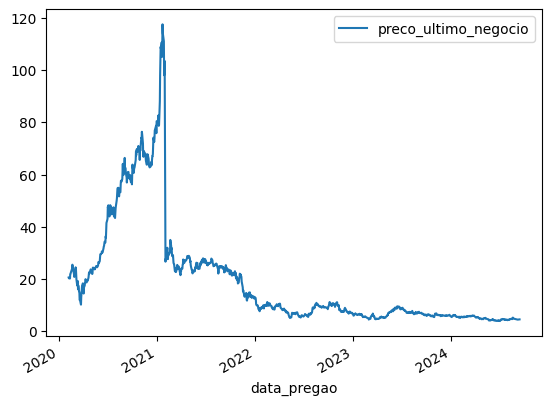

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('./dataset/dados_pregao_lwsa3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

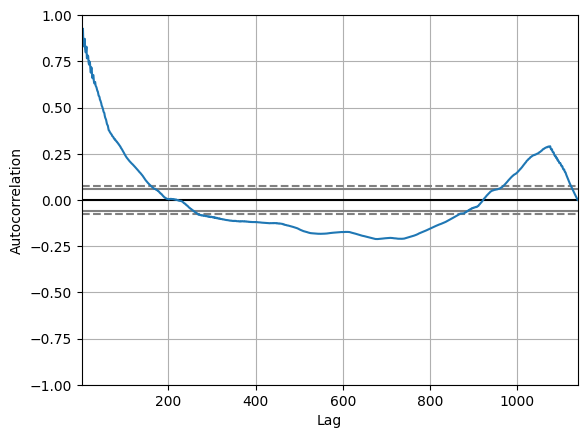

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [3]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [4]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7619.837, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8614.469, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8295.946, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7864.970, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8612.469, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7717.841, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7738.041, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7361.422, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7361.256, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7361.177, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8099.348, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7361.478, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7363.087, Time=1.00 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7359.179, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]          

predicted=6.091528, expected=5.980000
predicted=5.829679, expected=6.090000
predicted=5.966535, expected=6.160000
predicted=6.040768, expected=6.000000
predicted=6.017391, expected=6.020000
predicted=6.095293, expected=5.980000
predicted=6.114695, expected=6.010000
predicted=6.002297, expected=5.980000
predicted=6.010886, expected=5.850000
predicted=5.984639, expected=5.990000
predicted=5.990066, expected=6.080000
predicted=5.956281, expected=6.150000
predicted=5.900318, expected=5.920000
predicted=6.020856, expected=5.950000
predicted=6.078658, expected=5.980000
predicted=6.085847, expected=6.090000
predicted=5.932730, expected=6.030000
predicted=5.968782, expected=6.030000
predicted=6.006430, expected=6.270000
predicted=6.074765, expected=6.300000
predicted=6.053377, expected=6.010000
predicted=6.100327, expected=5.570000
predicted=6.246619, expected=5.510000
predicted=6.172204, expected=5.420000
predicted=5.874554, expected=5.600000
predicted=5.545527, expected=5.800000
predicted=5.

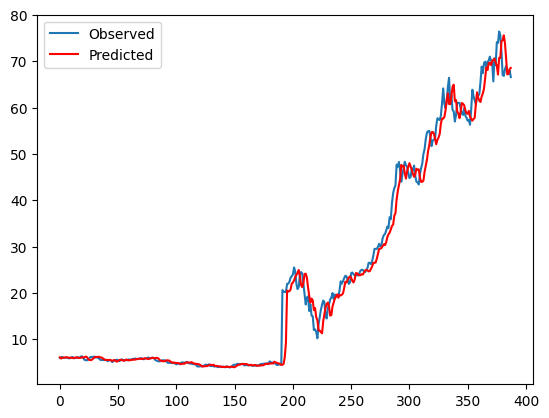

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()